## Final Project Submission

Please fill out:
* Student name: Mika Wambua Benson
* Student pace: part-time
* Scheduled project review date/time: 23/12/2024
* Instructor name: Samuel Karu
* Blog post URL: 


### Introduction

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

![image.png](attachment:6c01ff50-6b3b-4194-9d73-65a619c4465e.png)

### Problem Statement
While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!


### Objectives
1. Which HomePlanet had the highest Transportation rate for its passengers.

2. Check whether the passenger being on CryoSleep contributed to the passengers being transported.

3. Examine the trends for the passengers age that were transported to the another dimension. 

4. Develop the best machine learning algorith that predicts whether the passengers were transported or not.

### Data 
The dataset was extracted from :https://www.kaggle.com/competitions/st-2-ml-bootcamp/code


## Importing necessary libraries

In [1737]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import roc_curve, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

### Loading the files

In [1738]:
data_s = pd.read_csv("./data/sample_submission.csv")
data = pd.read_csv("./data/train.csv")
data_t = pd.read_csv("./data/test.csv")

In [1739]:
# check the first few rows for the train csv file
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Data Understanding

* train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

* PassengerId - A unique Id for each passenger. Each Id takes the form 0001_01 where 0001 indicates a group the passenger is travelling with and 01 is their number within the group. People in a group are often family members, but not always.

* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

* Destination - The planet the passenger will be debarking to.

* Age - The age of the passenger.

* VIP - Whether the passenger has paid for special VIP service during the voyage.

* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* Name - The first and last names of the passenger.

* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

* test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

* sample_submission.csv - A submission file in the correct format.

* PassengerId - Id for each passenger in the test set.

* Transported - The target. For each passenger, predict either True or False.

In [1740]:
# get the number of rows and columns 
print(data.shape)

(8693, 14)


In [1741]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [1742]:
# check the statistical analysis for the data
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [1743]:
# select the columns to work with
selected_columns = data.drop(columns = ['PassengerId', 'Name', 'Cabin'])
selected_columns.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


## Data Preparation

In [1744]:
# create a copy before cleaning 
data = selected_columns.copy()
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [1745]:
# Drop the duplicates values in the dataset
data = data.drop_duplicates()
data.duplicated().sum()

0

In [1746]:
# check the number of rows and column
data.shape

(6427, 11)

## Handle missing values

In [1747]:
# create a copy before cleaning the dataset.
clean_data = data.copy()
data_1 = clean_data

In [1748]:
data_1.isna().sum().sort_values(ascending = False)

CryoSleep       208
ShoppingMall    199
VIP             191
HomePlanet      186
Spa             182
VRDeck          182
Destination     178
RoomService     178
FoodCourt       175
Age             120
Transported       0
dtype: int64

In [1749]:
# Handle the rows with missing values for the categorical columns.
check_columns = ['CryoSleep', 'VIP', 'HomePlanet', 'Destination']
data_1 = data_1.dropna(subset = check_columns)


In [1750]:
# handle the missing values in continous variables
data_1['Age'] = data_1['Age'].fillna(data_1['Age'].median())
data_1['RoomService'] = data_1['RoomService'].fillna(0)
data_1['VRDeck'] = data_1['VRDeck'].fillna(0)
data_1['Spa'] = data_1['Spa'].fillna(data_1['Spa'].median())
data_1['FoodCourt'] = data_1['FoodCourt'].fillna(0)
data_1['ShoppingMall'] = data_1['ShoppingMall'].fillna(data_1['ShoppingMall'].median())


In [1751]:
data_1.shape

(5687, 11)

In [1752]:
data_1.isna().sum().sort_values(ascending = False)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [1753]:
data_1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [1754]:
# Analysis for the planet that had the highest percentage being transported
planet_transported = data_1.groupby("HomePlanet")["Transported"].mean().sort_values(ascending = False)
print(planet_transported)



HomePlanet
Europa    0.492123
Mars      0.345217
Earth     0.342072
Name: Transported, dtype: float64


* The passengers from Europa have the highest transportation rate with approximately 49.2% of them being transported.

* The passengers from Mars have a moderate transportation rate with roughly 34.5 % of them being transported.

* Roughly about 34.2% of passengers from homeplanet Earth might have been transported

<Axes: xlabel='HomePlanet', ylabel='Count'>

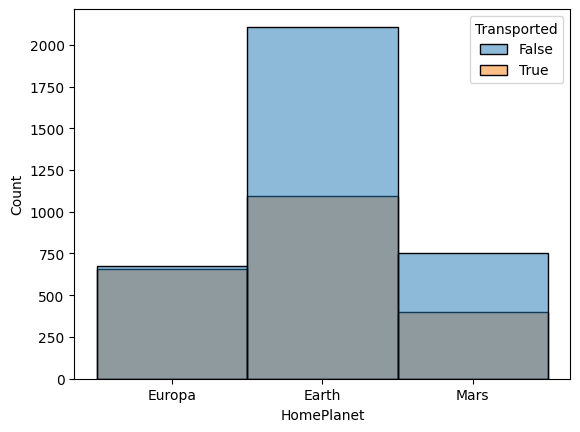

In [1755]:
sns.histplot(data_1, hue = "Transported",x = "HomePlanet" )

In [1756]:
# Check whether being placed on cryosleep contributed to being transported
cyosleep_outcome = data_1.groupby("CryoSleep")["Transported"].mean()
print(cyosleep_outcome)



CryoSleep
False    0.310366
True     0.745187
Name: Transported, dtype: float64


* for the passengers not in CryoSleep (false) they have a 31.0% chances of being transported to another dimension.

* for the passengers in CryoSleep (true) they have a 74.5% chances of being transported to another dimension.

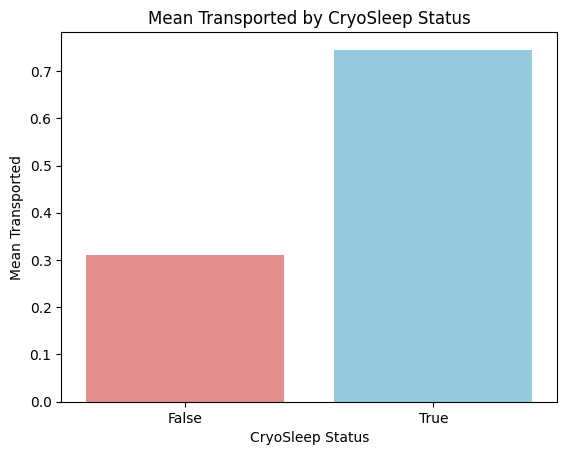

In [1757]:
# Create a bar plot using seaborn
sns.barplot(x=cyosleep_outcome.index, y=cyosleep_outcome.values, palette=['lightcoral', 'skyblue'])

# Add titles and labels
plt.title('Mean Transported by CryoSleep Status')
plt.xlabel('CryoSleep Status')
plt.ylabel('Mean Transported')
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [1758]:
data_1["Destination"].value_counts()

Destination
TRAPPIST-1e      3995
55 Cancri e      1176
PSO J318.5-22     516
Name: count, dtype: int64

In [1759]:
# Check the spending behavior for each passenger then group the data by Transported to calculate the mean cost for spending
data_1["Spending_cost"] = data_1[["RoomService", "VRDeck", "ShoppingMall", "Spa", "FoodCourt"]].sum(axis = 1)
spending_analysis = data_1.groupby("Transported")["Spending_cost"].mean().sort_values(ascending = False)
print(spending_analysis)

Transported
False    2242.011588
True     1674.788739
Name: Spending_cost, dtype: float64


* On average the passengers who were not transported spent more (2242.011588) on average compared to those who were transported who spent (1674.788739)


In [1760]:
data_1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Spending_cost
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0


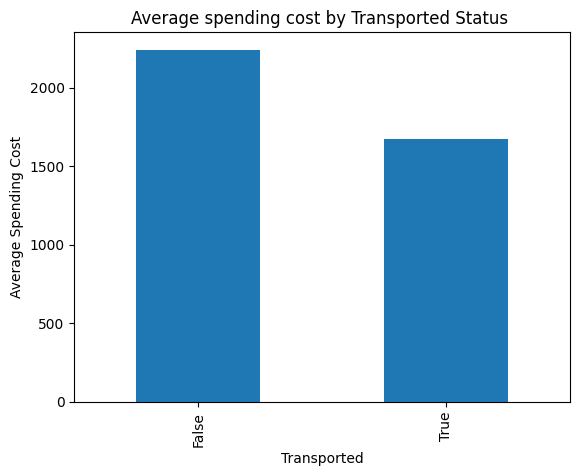

In [1761]:
# Visualize the data
spending_analysis.plot(kind = "bar", title = "Average spending cost by Transported Status ")
plt.xlabel('Transported')
plt.ylabel('Average Spending Cost')
plt.show()

In [1762]:
# Get the trends for the passengers age that were transported to the another dimension 
data_1['AgeGroup'] = pd.cut(data_1['Age'], bins=[15, 25, 35, 55, 80], labels=['Teenagers', 'Young Adult', 'Middle Aged', 'Senior'])
age_effect = data_1.groupby('AgeGroup')['Transported'].mean()
print(age_effect)

AgeGroup
Teenagers      0.348023
Young Adult    0.347771
Middle Aged    0.384262
Senior         0.440476
Name: Transported, dtype: float64


* for Teenagers passengers approximately 34.8% for that age_group were transported.

* for Adult passengers approximately 34.7% for that age_group were transported.

* for Middle Aged passengers around 38.4% for that age_group were transported.

* for Senior passengers approximately 44.0% for that age_group were transported.


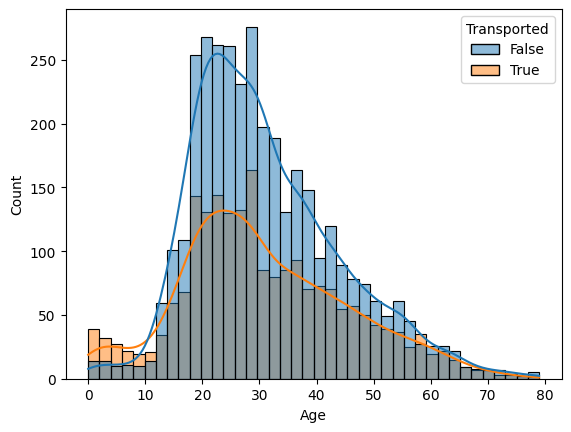

In [1763]:
# visualize the Age of the passengers and the transportation rate.
sns.histplot(data_1, x = "Age", hue = "Transported", kde = True);

## Data Preprocessing

In [1764]:
# select the categorical variables
catagoricals = data_1.select_dtypes(include = "object")
catagoricals.head()

,HomePlanet,CryoSleep,Destination,VIP
0,Europa,False,TRAPPIST-1e,False
1,Earth,False,TRAPPIST-1e,False
2,Europa,False,TRAPPIST-1e,True
3,Europa,False,TRAPPIST-1e,False
4,Earth,False,TRAPPIST-1e,False


In [1765]:
# select the continous variables
continous = data_1.select_dtypes(include = "number")
continous.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Spending_cost
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1091.0


In [1766]:
data_1.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Spending_cost', 'AgeGroup'],
      dtype='object')

In [1767]:
# select the columns for preprocessing step
columns = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']

data_2 = data_1[columns]
data_2.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True


In [1768]:
data_2.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')

In [1769]:
data_2.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True


In [1770]:
# converting the columns to object then create a copy 
data_2.columns.astype(str).copy()

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')

In [1771]:
# check the data types 
data_2.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

### Select the features and target then perform split on the dataset into train and test set

In [1772]:
# select the features and target
X = data_2.drop(columns = ["Transported"], axis = 1)
y = data_2["Transported"]

# Preprocessing the data for both categorical and numerical features
cat_features = ['HomePlanet', 'CryoSleep', 'Destination']
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [1773]:
# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# check the shapes for both X_train and X_test 
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4549, 9)
Shape of X_test: (1138, 9)
Shape of y_train: (4549,)
Shape of y_test: (1138,)


In [1774]:
X_train_categorical = X_train.select_dtypes(include = "object")

X_test_categorical = X_test.select_dtypes(include = "object")

In [1775]:
# Initialize OneHotEncoder with drop='first'
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Fit and transform the data
ohe.fit(X_train_categorical)

# Create a DataFrame from the transformed data
X_train_ohe = pd.DataFrame(ohe.transform(X_train_categorical),
                           index = X_train_categorical.index,
                           columns = np.hstack([category[1:] for category in ohe.categories_])) # Drop first category of each feature

X_test_ohe = pd.DataFrame(ohe.transform(X_test_categorical),
                           index = X_test_categorical.index,
                           columns = np.hstack([category[1:] for category in ohe.categories_])) 

In [1776]:
# select the numericals columns 
X_train_numericals = X_train.select_dtypes(include = ["float", "int"])

X_test_numericals = X_test.select_dtypes(include = ["float", "int"])

# standardize the numerical data
scaler = MinMaxScaler().fit(X_train_numericals)

X_train_scaled = pd.DataFrame(scaler.transform(X_train_numericals),
                              index = X_train_numericals.index,
                              columns = X_train_numericals.columns)


X_test_scaled = pd.DataFrame(scaler.transform(X_test_numericals),
                              index = X_test_numericals.index,
                              columns = X_test_numericals.columns)

In [1777]:
data_2.shape

(5687, 10)

In [1778]:
# concatenate the X_train_ohe, X_train_scaled
X_train_final = pd.concat([X_train_ohe, X_train_scaled], axis = 1)

# # concatenate the X_test_ohe, X_test_scaled
X_test_final = pd.concat([X_test_ohe, X_test_scaled], axis = 1)

X_train_final.head()

,Europa,Mars,True,PSO J318.5-22,TRAPPIST-1e,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
5222,0.0,0.0,0.0,0.0,0.0,0.329114,0.000000,0.014645,0.000000,0.000000,0.020843
44,0.0,0.0,1.0,0.0,0.0,0.050633,0.000000,0.000000,0.000000,0.000000,0.000000
4841,0.0,0.0,0.0,0.0,1.0,0.506329,0.010540,0.000000,0.030351,0.000000,0.000000
8236,0.0,0.0,0.0,1.0,0.0,0.227848,0.000000,0.000108,0.004682,0.026241,0.000000
5581,0.0,0.0,0.0,1.0,0.0,0.594937,0.011377,0.000072,0.000468,0.026464,0.000000


In [1779]:
X_train_final.dtypes

Europa           float64
Mars             float64
True             float64
PSO J318.5-22    float64
TRAPPIST-1e      float64
Age              float64
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
dtype: object

## Step1: Create the Logistic Regression model as the baseline model

In [1780]:
# Ensure all column names are strings
X_train_final.columns = X_train_final.columns.astype(str)

# Initialize and fit the Logistic Regression model then regularize the regression to reduce overfitting on the model
logreg = LogisticRegression(fit_intercept = False, C = 0.1, solver='liblinear')
baseline_model = logreg.fit(X_train_final, y_train)
baseline_model

LogisticRegression(C=0.1, fit_intercept=False, solver='liblinear')

In [1781]:
# get the predictions
y_pred = baseline_model.predict(X_train_final)

# Calculate accuracy score
accuracy = accuracy_score(y_train, y_pred)

# Generate classification report
report = classification_report(y_train, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7120246207957793
Classification Report:
              precision    recall  f1-score   support

       False       0.71      0.92      0.80      2815
        True       0.74      0.38      0.50      1734

    accuracy                           0.71      4549
   macro avg       0.72      0.65      0.65      4549
weighted avg       0.72      0.71      0.68      4549



The baseline_model has an accuracy score of 0.7120246207957793 which means that 71.20% of the predictions made by
model across the classes are correct.

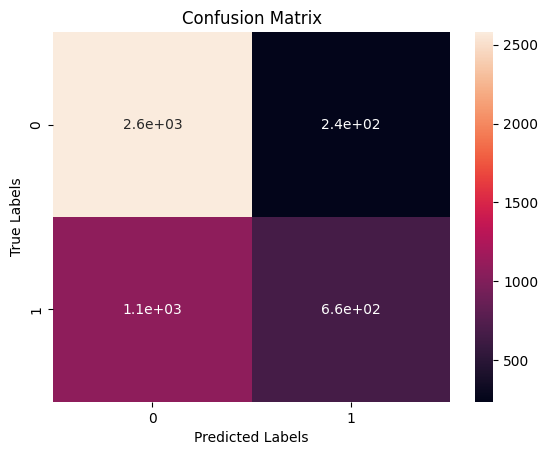

[[2580  235]
 [1075  659]]


In [1782]:
# computing for the confusion matrix
cfn = confusion_matrix(y_train, y_pred)
sns.heatmap(cfn, annot = True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(cfn)

* True Negatives (TN) = 2580: The model correctly predicted 2401 instances as the negative class.

* False Positives (FP) = 235: The model incorrectly predicted 414 instances as the positive class when they were actually negative.

* False Negatives (FN) = 1075: The model incorrectly predicted 617 instances as the negative class when they were actually positive.

* True Positives (TP) = 659: The model correctly predicted 1117 instances as the positive class.


0.7321750139821888


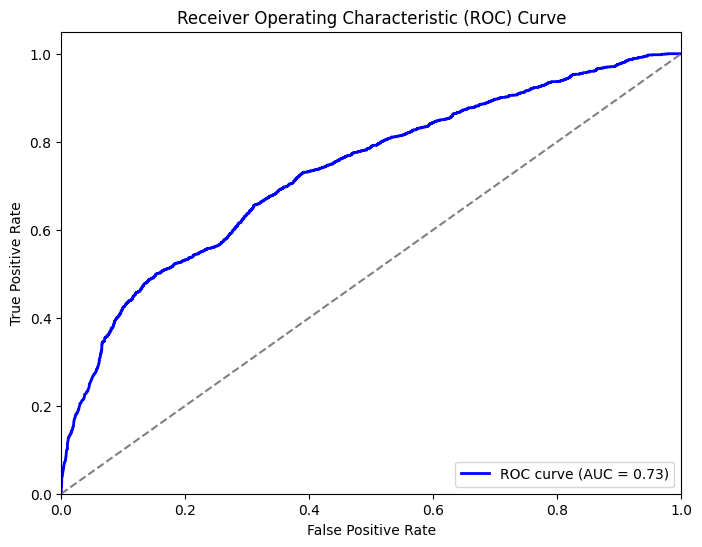

In [1783]:
# get the probabilities for the positive class instance
y_pred_prob = baseline_model.predict_proba(X_train_final)[:, 1]

# calculate the ROC curve 
fpr, tpr,_ = roc_curve(y_train, y_pred_prob)

roc_auc = auc(fpr, tpr)
print(roc_auc)

# plot the ROC curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


* The AUC value for the baseline_model is 0.7321750139821888 which means that the baseline model has 73.22% probability of correctly classifying randomly chosen positive sample True (Transported) and negative sample False(Not Transported)

### Create a Decision Tree Model

In [1784]:
# create split dataset for the decision tree
X_test_dt = X_test_final.copy()
X_train_dt = X_train_final.copy()
y_test_dt = y_test.copy()
y_train_dt = y_train.copy()

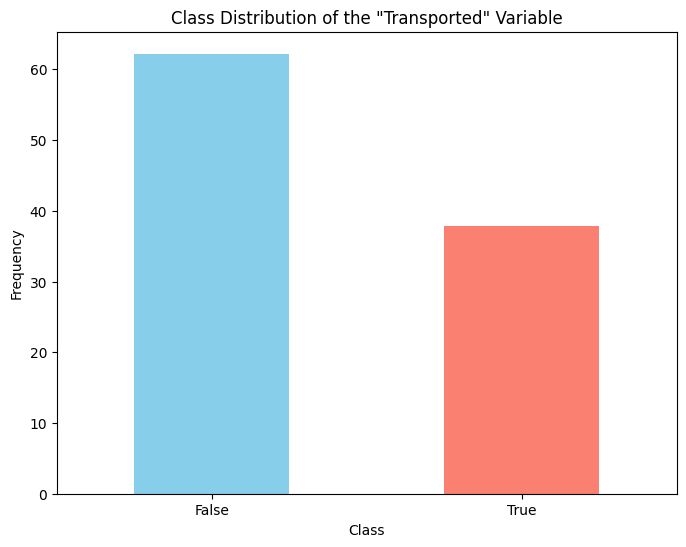

Transported
False    62.212063
True     37.787937
Name: proportion, dtype: float64


In [1785]:
# Assuming data_2 is your DataFrame and "Transported" is your target column
class_distribution = data_2["Transported"].value_counts(normalize = True) * 100

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution of the "Transported" Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Print the class distribution
print(class_distribution)


From the bar graph its clear that there's a significant class imbalance between the two classes. 62.21% of the instances are labeled as "False" for the Transported variable, meaning that the majority of the samples did not get transported by the anormaly 
For the other instan, 37.79% of the instances are labeled as "True," meaning that a smaller proportion of the samples were successfully transported.

In [1786]:
# Ensure all column names are strings
X_train_dt.columns = X_train_dt.columns.astype(str)
X_test_dt.columns = X_test_dt.columns.astype(str)

# create and fit the decision tree on the training set
DT_classifier = DecisionTreeClassifier(criterion = "entropy" ,random_state = 42, class_weight = "balanced")
DT_classifier.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [1787]:
y_pred_dt = DT_classifier.predict(X_test_dt)
y_pred_prob_dt = DT_classifier.predict_proba(X_test_dt)[:, 1]

In [1788]:
# Calculate the accuracy score for the decision tree
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)

# 6. Generate the classification report
report_dt = classification_report(y_test_dt, y_pred_dt)

# Print results
print(f"Accuracy: {accuracy_dt}")
print("Classification Report:")
print(report_dt)


Accuracy: 0.726713532513181
Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.76      0.78       723
        True       0.62      0.66      0.64       415

    accuracy                           0.73      1138
   macro avg       0.71      0.71      0.71      1138
weighted avg       0.73      0.73      0.73      1138



The untuned decisison Tree has an accuracy score of 0.726713532513181 which means that 72.67% of the predictions made by
model across the classes are correct.

0.7129997167091602


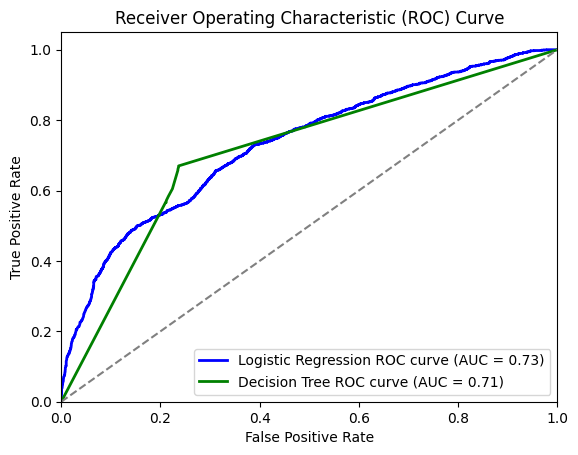

In [1789]:
# get the probabilities for the positive class instance
y_pred_prob_dt_untuned = DT_classifier.predict_proba(X_test_dt)[:, 1]

# calculate the ROC curve 
fpr_untuned, tpr_untuned,_ = roc_curve(y_test_dt, y_pred_prob_dt_untuned)

roc_auc_dt_untuned = auc(fpr_untuned, tpr_untuned,)
print(roc_auc_dt_untuned)


import matplotlib.pyplot as plt

# Plot ROC curves
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression ROC curve (AUC = {roc_auc:.2f})')
plt.plot(fpr_untuned, tpr_untuned, color='green', lw=2, label=f'Decision Tree ROC curve (AUC = {roc_auc_dt_untuned:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier diagonal

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [1790]:
# Tune the decision tree using the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'class_weight': [None, 'balanced']
}

In [1791]:
# Initialize the Decision Tree classifier
DT_classifier = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=DT_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_dt, y_train_dt)

# Get the best model
best_DT_classifier = grid_search.best_estimator_

# Predict probabilities for the best Decision Tree
y_pred_prob_dt_tuned = best_DT_classifier.predict_proba(X_test_dt)[:, 1]

# Compute ROC curve and AUC for the best Decision Tree
fpr_dt_tuned, tpr_dt_tuned, _ = roc_curve(y_test_dt, y_pred_prob_dt_tuned)
roc_auc_dt_tuned = roc_auc_score(y_test_dt, y_pred_prob_dt_tuned)


Fitting 5 folds for each of 384 candidates, totalling 1920 fits


In [1729]:
# Predict on the test set
y_pred_dt = best_DT_classifier.predict(X_test_dt)

# Print the accuracy score
print("Best Decision Tree Model Accuracy:", accuracy_score(y_test_dt, y_pred_dt))

# Print the classification report
print("Classification Report:\n", classification_report(y_test_dt, y_pred_dt))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_dt, y_pred_dt))

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Decision Tree Model Accuracy: 0.7653778558875219
Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.84      0.82       723
        True       0.69      0.64      0.67       415

    accuracy                           0.77      1138
   macro avg       0.75      0.74      0.74      1138
weighted avg       0.76      0.77      0.76      1138

Confusion Matrix:
 [[604 119]
 [148 267]]
Best Hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 20}


The tuned Decision Tree model has an improved accuracy score of approximately 0.7653778558875219 which means that the Decision Tree model predicts 76.54% of the predictions made by the model on the classes are correct.

Tuned Decison Tree model shows a slight improvement in the accuracy and maintains balance across the classes. This means that the Hyperparameter tuning enabled the model generalize better without overfitting.

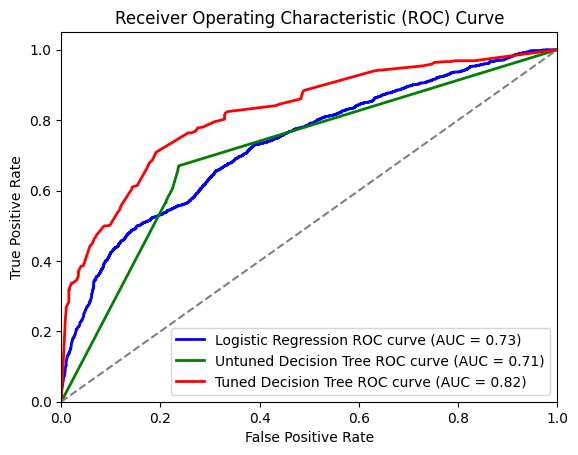

In [1730]:
# Plot ROC curves
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression ROC curve (AUC = {roc_auc:.2f})')
plt.plot(fpr_untuned, tpr_untuned, color='green', lw=2, label=f'Untuned Decision Tree ROC curve (AUC = {roc_auc_dt_untuned:.2f})')
plt.plot(fpr_dt_tuned, tpr_dt_tuned, color='red', lw=2, label=f'Tuned Decision Tree ROC curve (AUC = {roc_auc_dt_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier diagonal

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Create a Random Forest Classifier

In [1731]:
# create split dataset for the decision tree
X_test_rf = X_test_final.copy()
X_train_rf = X_train_final.copy()
y_test_rf = y_test.copy()
y_train_rf = y_train.copy()

In [1733]:
# Ensure all column names are strings
X_train_rf.columns = X_train_rf.columns.astype(str)

X_test_rf.columns = X_test_rf.columns.astype(str)

# handle class imbalance using smote
smote = SMOTE(random_state = 42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_rf, y_train_rf)


# initialize the Random Firest Classifier
random_forest = RandomForestClassifier(n_estimators = 100,
                                       criterion = "entropy", # set the criterion to entropy
                                       class_weight = "balanced", # adjusting the class weights
                                       random_state = 42)

In [1734]:
# Step 3: Train the Random Forest model
random_forest.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [ ]:
# Step 4: Evaluate the model
y_pred_rf = random_forest.predict(X_test_rf)


# Compute FPR, TPR, and thresholds
fpr_rf, tpr_rf, thresholds = roc_curve(y_test_rf, y_pred_rf)

# Compute AUC
roc_auc_score_rf = roc_auc_score(y_test_rf, y_pred_rf)

print("AUC Score:", roc_auc_score_rf)

# Evaluate the model
accuracy = accuracy_score(y_test_rf, y_pred_rf)
print("Accuracy of the Random Forest model:", accuracy)

print("Classification Report:")
print(classification_report(y_test_rf, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test_rf, y_pred_rf))

AUC Score: 0.7429618890499758
Accuracy of the Random Forest model: 0.7627416520210897
Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.82      0.81       723
        True       0.68      0.67      0.67       415

    accuracy                           0.76      1138
   macro avg       0.74      0.74      0.74      1138
weighted avg       0.76      0.76      0.76      1138

Confusion Matrix:
[[590 133]
 [137 278]]


From all predictions made by the Random Forest model, approximately 76.27% of them are correct. This includes both correct predictions for the positive class (True) and the negative class (False).

AUC value of 0.7429 means the model has a 74.29% probability of ranking a randomly chosen positive instance higher than a randomly chosen negative instance.

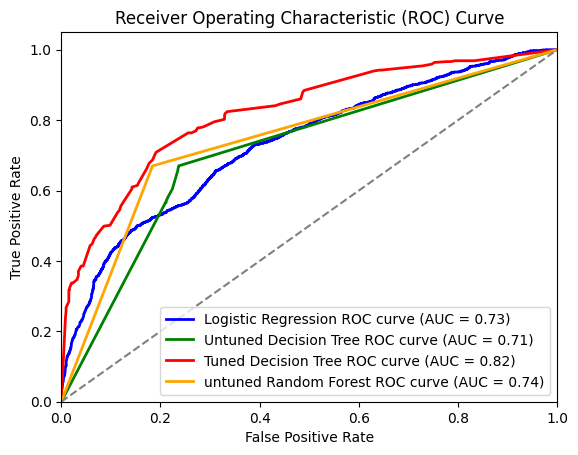

In [1736]:
# Plot ROC curves
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression ROC curve (AUC = {roc_auc:.2f})')
plt.plot(fpr_untuned, tpr_untuned, color='green', lw=2, label=f'Untuned Decision Tree ROC curve (AUC = {roc_auc_dt_untuned:.2f})')
plt.plot(fpr_dt_tuned, tpr_dt_tuned, color='red', lw=2, label=f'Tuned Decision Tree ROC curve (AUC = {roc_auc_dt_tuned:.2f})')
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label=f'untuned Random Forest ROC curve (AUC = {roc_auc_score_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier diagonal

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


* Tuned Decision Tree (AUC = 0.82):
The tuned decision tree is the best-performing model in terms of distinguishing between the positive and negative classes. It shows significant improvement over the untuned decision tree and other models.

* Untuned Random Forest (AUC = 0.74):
The untuned random forest performs better than the untuned decision tree but slightly better than logistic regression. This shows that random forests, even without tuning, provide decent performance.

* Logistic Regression (AUC = 0.73):
Logistic regression is a relatively simple model, performing slightly worse than the random forest but better than the untuned decision tree.

* Untuned Decision Tree (AUC = 0.71):
The untuned decision tree is the weakest model here, emphasizing the importance of hyperparameter tuning.

### Conclusion

1. The passengers from Europa have the highest transportation rate with approximately 49.2% of them being transported from the 
   analysis.

2. For the Passengers in CryoSleep (true) they have a 74.5% chances of being transported to another dimension which suggests that
   passengers in Cryosleep were significantly more likely to be transported compared to those who 

3. From the analysis seems that the Elderly were transported more compared to the young teenagers 

4. The tuned decision tree is the best performing model in terms of distinguishing between the positive and negative classed since it shows improvement over the untuned decision tree and other models

### Recommendations 
1. We should prioritize more deeper analysis of passengers from Europa to identify the factors contributing to their high transportation rate. This could involve studying demographics, ticket prices, or other features unique to this group.

2. The tuned decision tree is the best performing model, however considering the roc for the untuned Random Forest seem to have potential for improvement. We could conduct Hyperparameter tuning for the random forest then evaluates its performance compared to the tuned decision tree.

3. We should use the tuned Decision Tree as our primary predictive model for making decisions regarding whether the passengers were transported or not, then monitor its performance on new data to ensure consistency and reliability
